# INTRODUCTION

Due to customers changing demand and increased competition among restaurants, ‘ratings’ has become vital for the business to succeed. Restaurant rating holds the key element of differentiation among competitors, this has been regarded as a valuable asset. One of the strategies is to focus on improving their ratings to add value to the restaurants. We want to observe whether or not ‘parking lot facility’ provided by the restaurant helps the user (based on their description i.e. the type of user) in increasing the overall rating of a restaurant. This way we will be able to decide whether or not the restaurant should work on improving its parking lot for higher ratings based on customer segmentation. This will be a good business model considering the high prevalence of restaurants throughout the world.

# 1. Data Selection

In [1]:
import pandas as pd
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import matplotlib.pyplot as plt
import matplotlib

This is the major overview or description of the data.

The data which we will be using contains many important attributes of top-end restaurants from Mexico and customer profiles. 

It contains multiple CSV data files, but we will be using 3 of them (chefmozparking.csv, userprofile.csv and rating_final.csv) to find the relationship between the user (based on its description) providing high ratings to a restaurant based on its parking lot. 

The "rating_final.csv" file contains the overall rating of the user along with food_rating and service_rating which is considered to be ideal while considering the performance metric for evaluating the restaurant. Another file "chefmozparking.csv" contains details of the parking lot whether it is public or street or no parking, etc.
Finally the "userprofile.csv", as the name suggest contains the description about the user of the restaurant (such as weight, height, marital_status, transport, smoker, etc).

The data is taken from the following source (UCI ML repository):

https://archive.ics.uci.edu/ml/datasets/Restaurant+&+consumer+data#

In [2]:
resp = urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip')
zf = ZipFile(BytesIO(resp.read()))
df1 = pd.read_csv(zf.open('chefmozparking.csv'))
df2 = pd.read_csv(zf.open("rating_final.csv"))
df3 = pd.read_csv(zf.open("userprofile.csv"))

In [3]:
df1.head()

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none


In [4]:
df2.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [5]:
df3.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


# 2. Data Preparation

### a. Merging the datasets

We will be merging both the datasets based on the common column placeID

In [6]:
df_temp = pd.merge(df1, df2, on="placeID", how="left")
df_temp.head()

,placeID,parking_lot,userID,rating,food_rating,service_rating
0,135111,public,NaN,NaN,NaN,NaN
1,135110,none,NaN,NaN,NaN,NaN
2,135109,none,U1030,0.0,0.0,0.0
3,135109,none,U1020,2.0,2.0,1.0
4,135109,none,U1051,1.0,1.0,1.0


In [7]:
df = pd.merge(df_temp, df3, on="userID", how="left")
df.head()

,placeID,parking_lot,userID,rating,food_rating,service_rating,latitude,longitude,smoker,drink_level,...,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,135111,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,135110,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,135109,none,U1030,0.0,0.0,0.0,18.844818,-99.182758,false,casual drinker,...,independent,1991.0,eco-friendly,hard-worker,Catholic,student,black,64.0,medium,1.75
3,135109,none,U1020,2.0,2.0,1.0,18.878189,-99.222969,false,abstemious,...,independent,1982.0,technology,hard-worker,Catholic,professional,blue,40.0,medium,1.68
4,135109,none,U1051,1.0,1.0,1.0,18.877719,-99.222990,false,casual drinker,...,independent,1979.0,variety,thrifty-protector,none,professional,blue,74.0,medium,1.76


### b. Missing Values

In [8]:
df.isna().sum()

placeID               0
parking_lot           0
userID              572
rating              572
food_rating         572
service_rating      572
latitude            572
longitude           572
smoker              572
drink_level         572
dress_preference    572
ambience            572
transport           572
marital_status      572
hijos               572
birth_year          572
interest            572
personality         572
religion            572
activity            572
color               572
weight              572
budget              572
height              572
dtype: int64

We find that there are few rows which contains the missing values and to deal with this we will remove such rows because we are only interested in the parking lot type and the overall ratings of the restaurant. So, we will now remove the rows containing the nan values

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

placeID             0
parking_lot         0
userID              0
rating              0
food_rating         0
service_rating      0
latitude            0
longitude           0
smoker              0
drink_level         0
dress_preference    0
ambience            0
transport           0
marital_status      0
hijos               0
birth_year          0
interest            0
personality         0
religion            0
activity            0
color               0
weight              0
budget              0
height              0
dtype: int64

Missing values are all removed

### c. Ensuring correct datatype

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 2 to 1645
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   placeID           1161 non-null   int64  
 1   parking_lot       1161 non-null   object 
 2   userID            1161 non-null   object 
 3   rating            1161 non-null   float64
 4   food_rating       1161 non-null   float64
 5   service_rating    1161 non-null   float64
 6   latitude          1161 non-null   float64
 7   longitude         1161 non-null   float64
 8   smoker            1161 non-null   object 
 9   drink_level       1161 non-null   object 
 10  dress_preference  1161 non-null   object 
 11  ambience          1161 non-null   object 
 12  transport         1161 non-null   object 
 13  marital_status    1161 non-null   object 
 14  hijos             1161 non-null   object 
 15  birth_year        1161 non-null   float64
 16  interest          1161 non-null   object 


We see that format of all the data types are correct with the numerical columns having float64 or int64 type and categorical columns having str (or object) data type.

### d. Removing redundant columns

The columns placeID, dress_preference, ambience, birth_year, interest, personality and userID (after we have merged the data) have no significant role in our data analysis part and therefore we can remove this column from our dataset.

In [12]:
df.drop(columns=['placeID', 'dress_preference', 'ambience', 'birth_year', 'interest', 'personality', 'userID'], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 2 to 1645
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   parking_lot     1161 non-null   object 
 1   rating          1161 non-null   float64
 2   food_rating     1161 non-null   float64
 3   service_rating  1161 non-null   float64
 4   latitude        1161 non-null   float64
 5   longitude       1161 non-null   float64
 6   smoker          1161 non-null   object 
 7   drink_level     1161 non-null   object 
 8   transport       1161 non-null   object 
 9   marital_status  1161 non-null   object 
 10  hijos           1161 non-null   object 
 11  religion        1161 non-null   object 
 12  activity        1161 non-null   object 
 13  color           1161 non-null   object 
 14  weight          1161 non-null   float64
 15  budget          1161 non-null   object 
 16  height          1161 non-null   float64
dtypes: float64(7), object(10)
memory 

# 3. Data Visualisation

### a. Scatter plot

Plotting the height and weight of the user with the hue based on the rating value to see if there forms any cluster to segment the customer

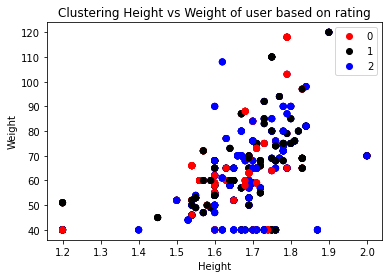

In [14]:
colors = ['red','black','blue']
scatter = plt.scatter(df['height'], df['weight'], c=df['rating'], cmap=matplotlib.colors.ListedColormap(colors))
plt.legend(handles=scatter.legend_elements()[0], labels=["0", "1", "2"])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Clustering Height vs Weight of user based on rating")
plt.show()

### Result

We don't find different clusters (and hence any relationship) between the weight and height of the users with respect to the ratings because they are all cluttered at a single place and no 2 different clusters are being formed.

### b. Bar plot 

We will be plotting a bar plot between ratings and parking lot type to observe a pattern or relation among them.

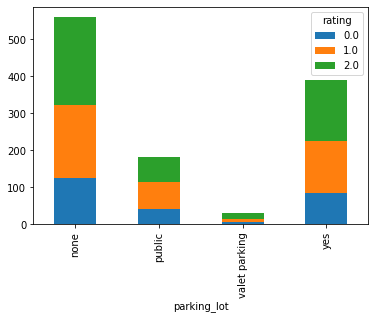

In [15]:
pd.crosstab(df['parking_lot'],df['rating']).plot(kind="bar",stacked=True)
plt.show()

### Result

We observe that the distribution of the ratings among different parking lot categories is mostly the same. Although the number of samples of dataset are higher in none and yes parking type but the distribution of the rating is most the same.

### c. Pie chart

We will check the distribution of the value count of the ratings via pie chart

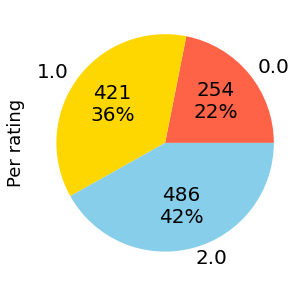

In [16]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

fig, ax1 = plt.subplots(ncols=1, figsize=(10, 5))

df.groupby('rating').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue'], ax=ax1)
ax1.set_ylabel('Per rating', size=18)
plt.show()

### Result

So the classes are not imbalanced as the distribution of the value of the ratings (0, 1 and 2) is almost balanced (with 0 class being on somewhat lower end and 2 being on the higher end). This is important to note down because if the classes are balanced then any classification algorithm in ML can be easily applied without worrying about the results or accuracy being affected.

### d. Bar plot

We will be plotting a bar plot between ratings and activities and also between religion and ratings to observe a pattern or relation between them.

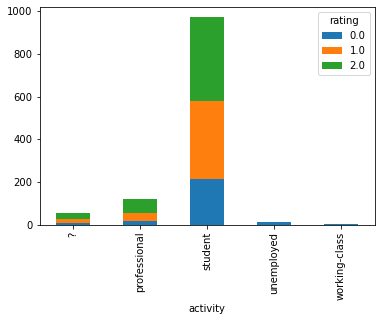

In [17]:
pd.crosstab(df['activity'],df['rating']).plot(kind="bar",stacked=True)
plt.show()

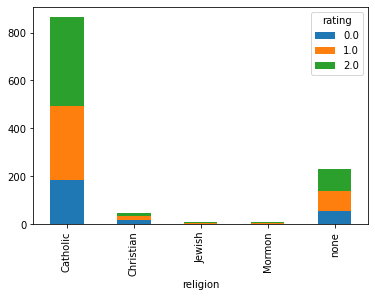

In [18]:
pd.crosstab(df['religion'],df['rating']).plot(kind="bar",stacked=True)
plt.show()

### Result

We see that the distribution of the ratings among different religions and also among various activites is mostly the same. So, the ratings is not effected by any religion or any activity of the user. 

## Conclusion

In the above analysis, we compared (by plotting scatter and bar plots) various users attributes such as the weight and height of the user, the activity of the user, and the religion of the user with the overall rating of the restaurant. We found that there was no relation between any of the user's attribute with the ratings.

We also plotted a bar chart to see the effect of various parking lot types on the ratings and found that the distribution of the ratings among different parking lot categories is mostly the same which means that the parking lot type also had NO effect on the overall rating of the restaurant.

So, in order to develop this work further, a more detailed study of the different features such as food_ratings and the ratings of the services provided by the restaurant could also be investigated, because they might seem to be a major factor contributing to the overall rating of the restaurant.